<a href="https://colab.research.google.com/github/ragav4/plant-leaves-disease-detection/blob/main/PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/dataset/archive.zip"

In [ ]:
!unzip /content/drive/MyDrive/dataset/archive.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16;


In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train=train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32)
val= train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img,label=train.next()

In [ ]:
import keras.layers
import keras
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from keras.models import Model



In [ ]:
base_model=VGG16(input_shape=(256,256,3),include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

model=Model(base_model.input,X)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=10,verbose=1)

mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)

cb=[es,mc]

In [ ]:
from keras.models import load_model
model=load_model("/content/drive/MyDrive/best_model.h5")

In [ ]:
acc =model.evaluate_generator(val)[1]

print(f"The accuracy of model is ={acc*100}%")

KeyboardInterrupt: ignored

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f"The image belongs to{ ref[pred]}")


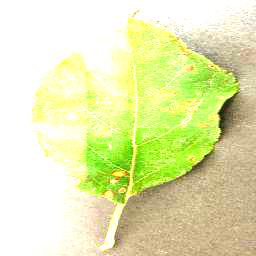

1/1 [==============================] - 0s 205ms/step
The image belongs toApple___Cedar_apple_rust


In [ ]:
from PIL import Image
path="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655_newPixel25.JPG"
ia=Image.open(path)
display(ia)
prediction(path)